In [8]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\a\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [10]:
import math

In [11]:
train_df = pd.read_csv('../Housing Dreams/house_train_raw.csv')


In [12]:
test_df = pd.read_csv('../Housing Dreams/houses_test_raw.csv')

In [13]:
print(train_df.shape)

(1460, 81)


In [14]:
print(test_df.shape)

(1459, 80)


In [15]:
# Descripción de train_df y de test_df
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [17]:
# Información de train_df y de test_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [19]:
#Recorro cada columna para posteriormente poder dividir entre variables categóricas y las numéricas
train_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Variables Categóricas: MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond,  RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageFinish, GarageCars, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition

Variables numéricas: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, SalePrice, YearBuilt, YearRemodAdd, GarageYrBlt.

In [20]:
# Clasifico las variables categóricas
categoricas_vari = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape','LandContour',\
                    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', \
                    'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', \
                    'RoofStyle', 'RoofMatl', 'Exterior1st', \
                    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', \
                    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',\
                    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', \
                    'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr','KitchenAbvGr',\
                    'KitchenQual', 'TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu',\
                    'GarageType', 'GarageFinish','GarageCars','GarageQual',\
                    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence','MiscFeature','MiscVal',\
                    'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

for x in categoricas_vari:
    print("{}: \n".format(x), "{} \n".format(train_df[x].value_counts()))

MSSubClass: 
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

MSZoning: 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Street: 
 Pave    1454
Grvl       6
Name: Street, dtype: int64 

Alley: 
 Grvl    50
Pave    41
Name: Alley, dtype: int64 

LotShape: 
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

LandContour: 
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

Utilities: 
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

LotConfig: 
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

LandSlope: 
 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

Neighborhood: 
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100


Valores faltantes

In [21]:
# Para analizar los valores faltantes primero contateno el datframe de entrenamiento y el de test
train_test = pd.concat([train_df, test_df], ignore_index=True)


In [22]:

train_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [23]:
# Busco valores faltantes en las columnas
train_test.columns[train_test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [24]:
# Busco la cantidad de nulos en cada columna siempre y cuando sea mayor a cero
null_num = train_test.isnull().sum()
null_num[null_num > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [25]:
# filtro y quiero aquellas columnas cuyos nulos tenga un ratio se mayor 0.1, ya que von esas voy a ver que hago
null_rate = train_test.isnull().sum() / train_test.shape[0]
null_rate[null_rate > 0.1]

LotFrontage    0.166495
Alley          0.932169
FireplaceQu    0.486468
PoolQC         0.996574
Fence          0.804385
MiscFeature    0.964029
SalePrice      0.499829
dtype: float64

Estas columnas tienen una alta tasa de faltantes, que pueden tener información menos útil para la predicción de precios, las eliminaremos del conjunto de datos.

In [26]:
train_test1 = train_test.drop(['LotFrontage', 'Alley', 'FireplaceQu','PoolQC','Fence', 'MiscFeature'], axis = 1)
train_test1.head(4)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0


In [27]:
# Con SimpleImputer reemplazo los valores faltantes con el valor más frecuente de cada columna, importo la librearía y módulo que voy a usar
from sklearn.impute import SimpleImputer


In [28]:
# Lleno los valores faltantes

my_imputer = SimpleImputer(strategy = 'most_frequent', fill_value = None)

train_test1_X = train_test1.drop(['SalePrice'], axis = 1)
imputed_train_test1_X = pd.DataFrame(my_imputer.fit_transform(train_test1_X))

# Reordeno el nombre de las columnas
imputed_train_test1_X.columns = train_test1_X.columns

imputed_train_test1_X


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [29]:
# Chequeo a ver si hay valores nulos 
imputed_train_test1_X.columns[imputed_train_test1_X.isnull().any()]

Index([], dtype='object')

In [30]:
# Vuelvo a separar el train del test

imputed_train_X = imputed_train_test1_X[0:1460]
imputed_test_X = imputed_train_test1_X[1460:2919]


In [31]:
imputed_train_X.head(3)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal


In [32]:
imputed_test_X.head(2)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1461,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal


In [33]:
train_data_fill = imputed_train_X
train_data_fill['SalePrice'] = train_df['SalePrice']
train_data_fill.head(3)

C:\Users\a\AppData\Local\Temp\ipykernel_17688\4068767067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_fill['SalePrice'] = train_df['SalePrice']


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [34]:
test_data_fill = imputed_test_X
test_data_fill

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1461,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
1462,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
1463,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
1464,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
2915,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2916,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
2917,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


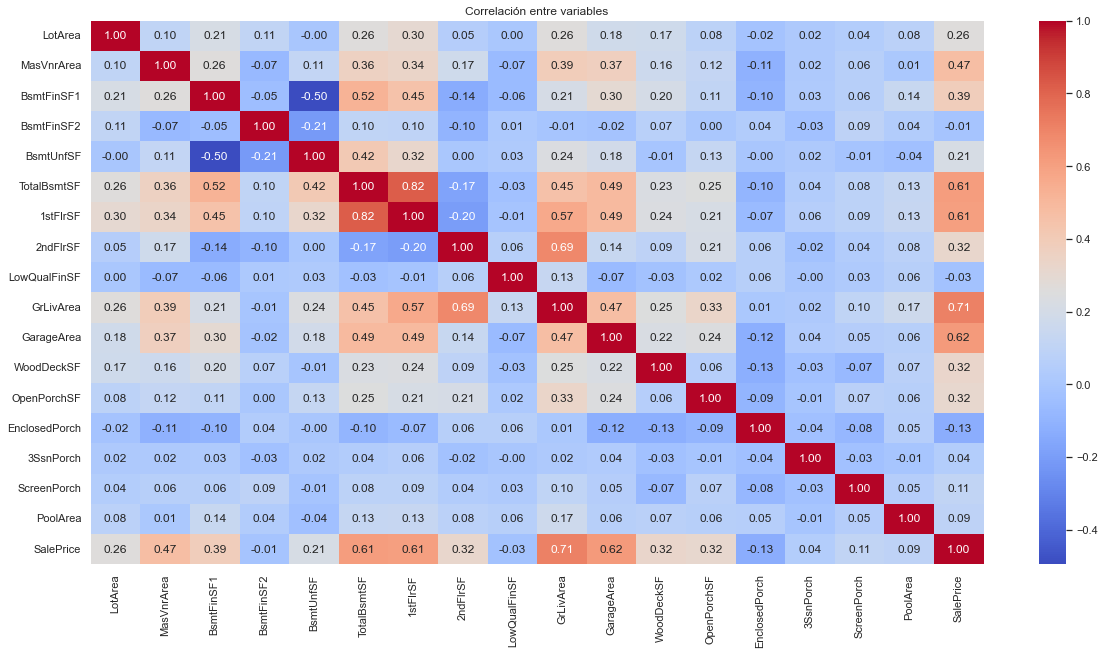

In [35]:
# Por medio del grafico Heatmap veo el tipo de corelacción que hay entre las variables
list1 = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',\
         '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',\
          'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',\
         'SalePrice']

plt.figure(figsize=(20, 10))
sns.heatmap(train_data_fill[list1].astype(int).corr(), cmap = "coolwarm", annot = True, \
            fmt = ".2f")

plt.title('Correlación entre variables')
plt.show()

Es clara la correlación entre cada característica numérica y SalePrice. Parecería que BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch y PoolArea tienen menos correlación con SalePrice

In [36]:
# Me deshago de las variables con baja correlación

train_data_fill1 = train_data_fill.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', \
                                         '3SsnPorch', 'ScreenPorch', 'PoolArea'], axis = 1)
test_data_fill1 = test_data_fill.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', \
                                         '3SsnPorch', 'ScreenPorch', 'PoolArea'], axis = 1)
train_data_fill1


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,40,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,349,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,60,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,366,0,0,4,2010,WD,Normal,142125


In [37]:
test_data_fill1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,140,0,0,6,2010,WD,Normal
1461,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,393,36,12500,6,2010,WD,Normal
1462,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,212,34,0,3,2010,WD,Normal
1463,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,360,36,0,6,2010,WD,Normal
1464,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,TA,TA,Y,0,82,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,0,0,6,2006,WD,Normal
2915,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,24,0,4,2006,WD,Abnorml
2916,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,474,0,0,9,2006,WD,Abnorml
2917,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,80,32,700,7,2006,WD,Normal


A continuación voy a ver la relación entre esas características categóricas de la casa con el precio de venta de la casa.

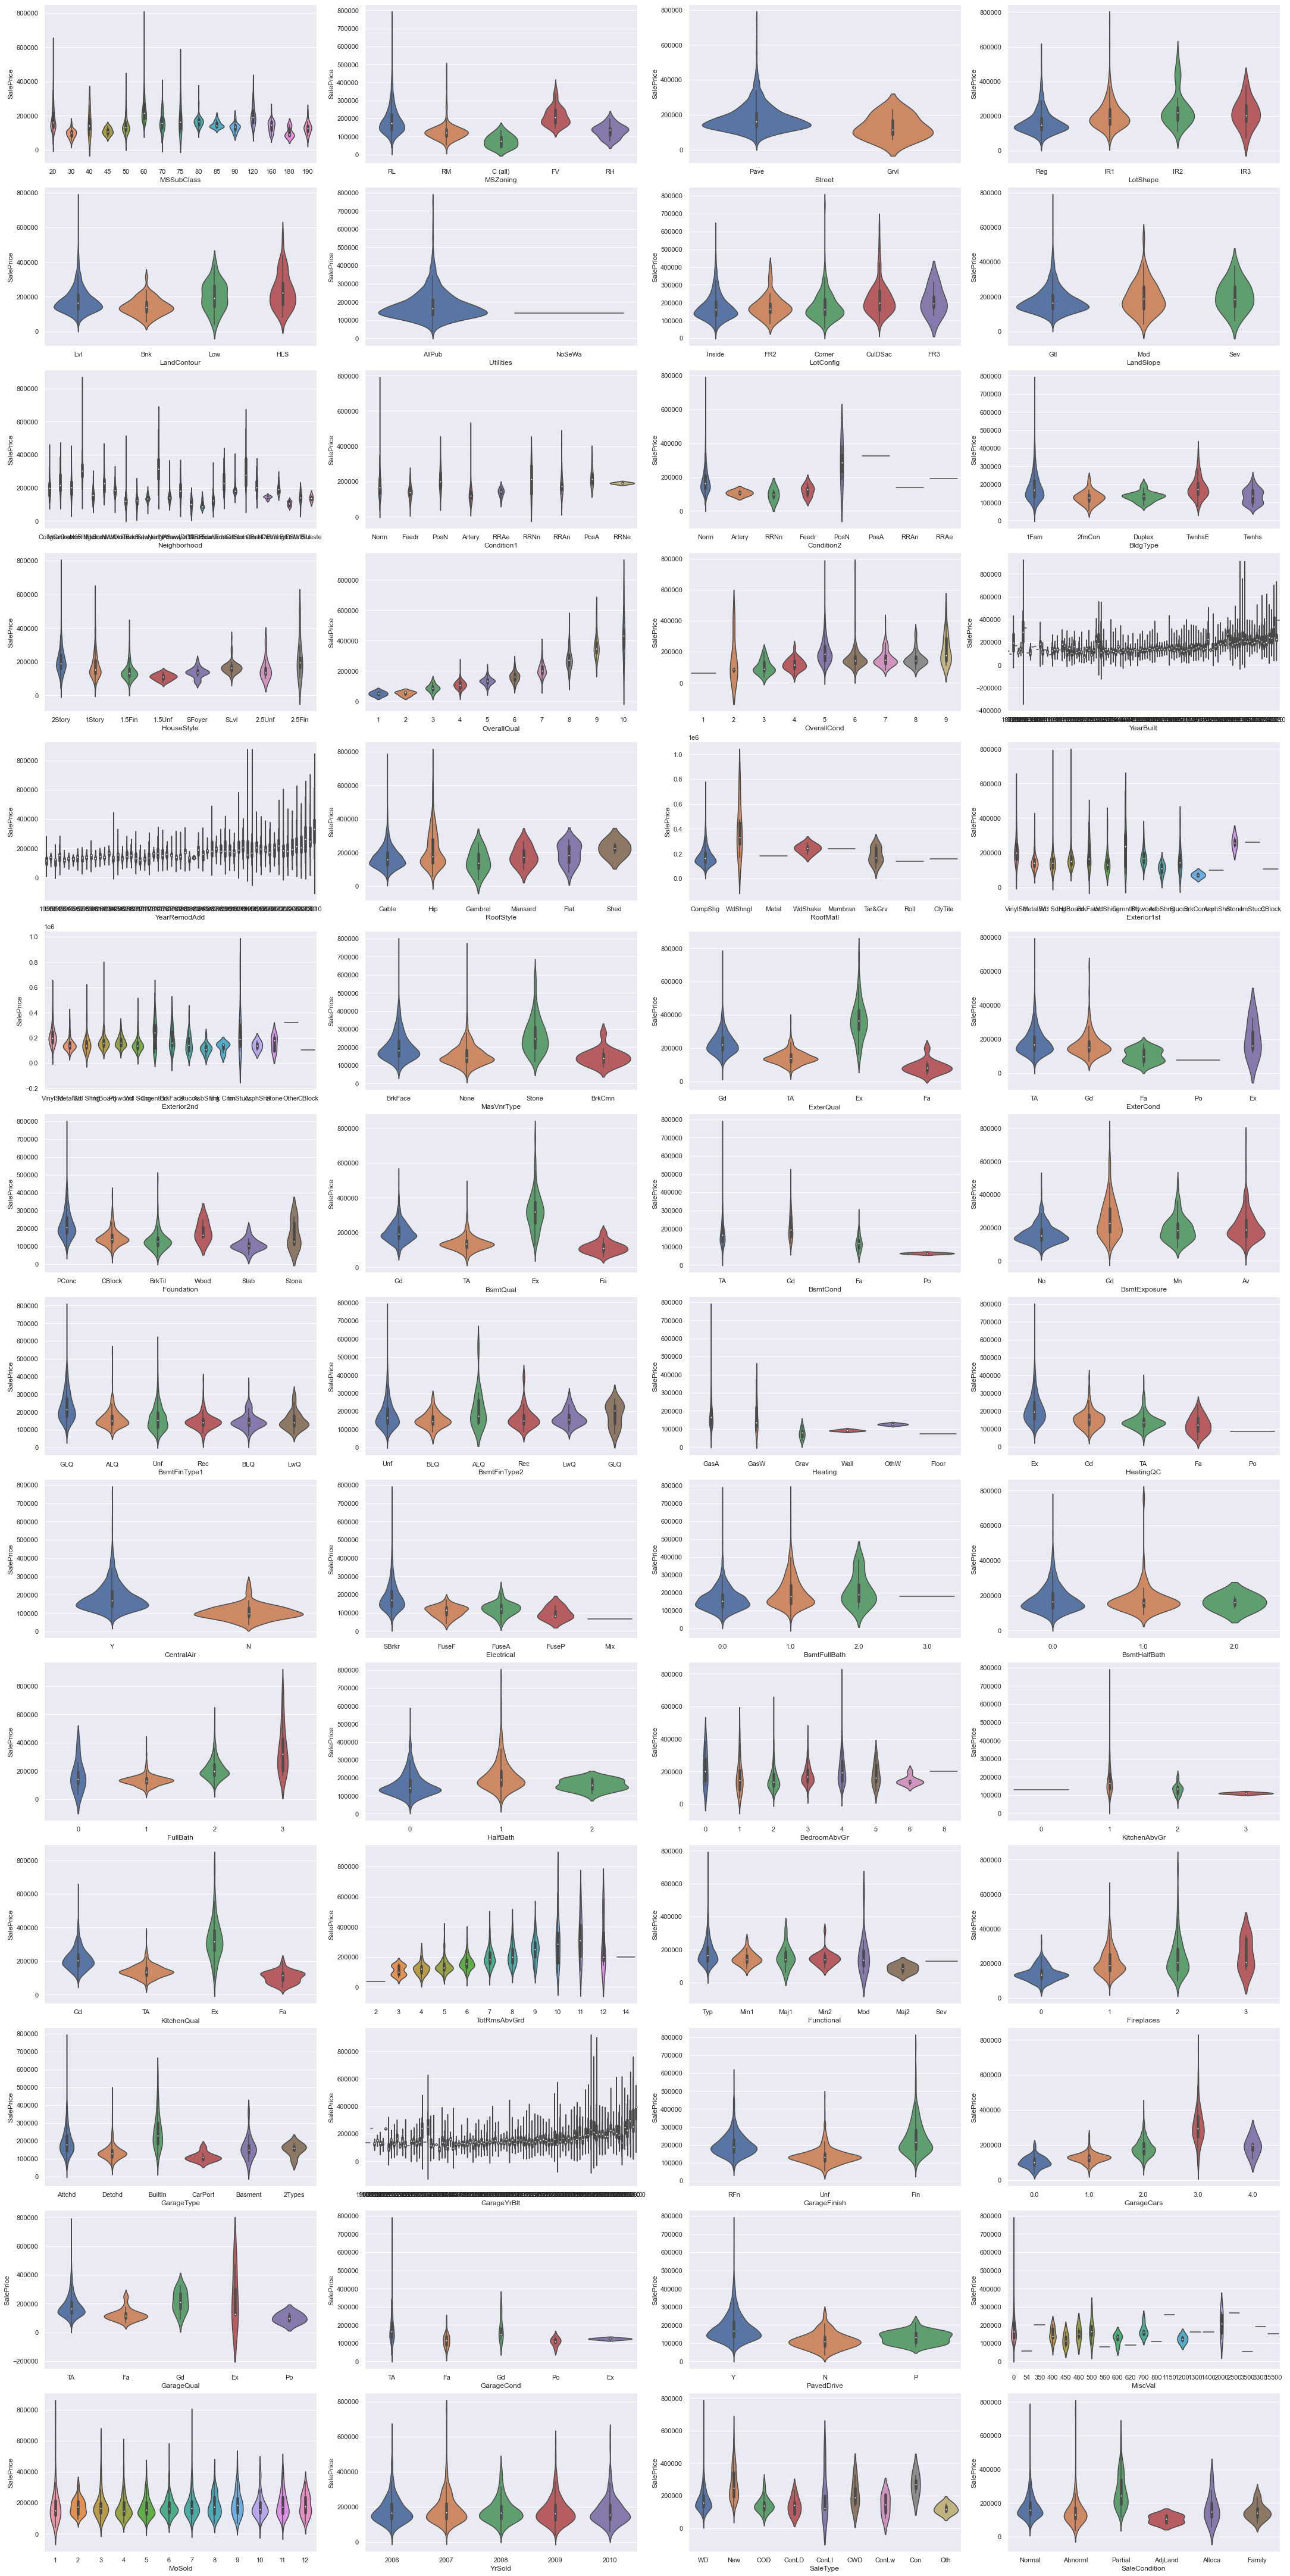

In [38]:
list2 = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', \
         'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1','Condition2','BldgType', \
         'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', \
         'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',\
         'ExterCond','Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', \
         'BsmtFinType2', 'Heating','HeatingQC', 'CentralAir', 'Electrical','BsmtFullBath',\
         'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', \
         'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', \
         'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', \
         'PavedDrive', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', \
         'SalePrice']

import math

n_cols = 4
n_rows = math.ceil((len(train_data_fill1[list2].columns) - 1) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize = (30,60), constrained_layout = True)
for col, ax in zip(train_data_fill1[list2].columns, axes.ravel()):
    sns.violinplot(ax = ax, x = col, y = 'SalePrice', data = train_data_fill1[list2])

plt.show()

De los 56 diagramas que se muestran, podemos encontrar que algunas de las variables categóricas tienen menos o incluso ninguna relación con la característica SalePrice.

Utilities, LotConfig, LandSlope, BsmtFinType1, BsmtFinType2, HeatingQC, BsmtFullBath, BsmtHalfBath, KitchenAbvGr, Functional, GarageCond, PavedDrive, MoSold y YrSold parecen no tener relación con la función SalePrice;
LotShape, LandContour, BldgType, HouseStyle, RoofStyle, ExterCond, Foundation, BsmtCond, BsmtExposure, Heating, Electrical, HalfBath y Fireplaces parecen tener menos relación con la función SalePrice. Así que consideramos descartar estas variables categóricas de ambos conjuntos de datos.

In [39]:
# Me deshago de las variables categóricas que no tiene relación con  SalePrice.

train_data_fill2 = train_data_fill1.drop(['Utilities', 'LotConfig', 'LandSlope', \
                                        'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', \
                                        'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', \
                                        'Functional', 'GarageCond', 'PavedDrive','MoSold',\
                                        'YrSold', 'LotShape', 'LandContour', 'BldgType', \
                                        'HouseStyle','RoofStyle','ExterCond','Foundation',\
                                        'BsmtCond', 'BsmtExposure','Heating','Electrical',\
                                        'HalfBath', 'Fireplaces'], axis = 1)
test_data_fill2 = test_data_fill1.drop(['Utilities', 'LotConfig', 'LandSlope', \
                                        'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', \
                                        'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', \
                                        'Functional', 'GarageCond','PavedDrive','MoSold',\
                                        'YrSold', 'LotShape', 'LandContour', 'BldgType', \
                                        'HouseStyle','RoofStyle','ExterCond','Foundation',\
                                        'BsmtCond', 'BsmtExposure','Heating','Electrical',\
                                        'HalfBath', 'Fireplaces'], axis = 1)
train_data_fill2.head(3)


,Id,MSSubClass,MSZoning,LotArea,Street,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,...,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,MiscVal,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,CollgCr,Norm,Norm,7,5,...,RFn,2.0,548.0,TA,0,61,0,WD,Normal,208500
1,2,20,RL,9600,Pave,Veenker,Feedr,Norm,6,8,...,RFn,2.0,460.0,TA,298,0,0,WD,Normal,181500
2,3,60,RL,11250,Pave,CollgCr,Norm,Norm,7,5,...,RFn,2.0,608.0,TA,0,42,0,WD,Normal,223500


In [40]:
test_data_fill2.head(3)

,Id,MSSubClass,MSZoning,LotArea,Street,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,MiscVal,SaleType,SaleCondition
1460,1461,20,RH,11622,Pave,NAmes,Feedr,Norm,5,6,...,1961.0,Unf,1.0,730.0,TA,140,0,0,WD,Normal
1461,1462,20,RL,14267,Pave,NAmes,Norm,Norm,6,6,...,1958.0,Unf,1.0,312.0,TA,393,36,12500,WD,Normal
1462,1463,60,RL,13830,Pave,Gilbert,Norm,Norm,5,5,...,1997.0,Fin,2.0,482.0,TA,212,34,0,WD,Normal


Necesitamos hacer algunas conversiones para obtener valores numéricos de estos datos en la variables categóricas

In [41]:
num_list = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',\
            '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Id']

year_list = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

Cate_list = ['MSSubClass', 'MSZoning', 'Street', 'Neighborhood','Condition1','Condition2',\
             'OverallQual', 'OverallCond', 'RoofMatl', 'Exterior1st', 'Exterior2nd', \
             'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir','FullBath','BedroomAbvGr',\
             'KitchenQual', 'TotRmsAbvGrd', 'GarageType', 'GarageFinish', 'GarageCars', \
             'GarageQual', 'MiscVal', 'SaleType', 'SaleCondition']

In [42]:
train_data_fill3 = train_data_fill2
train_data_fill3[num_list] = train_data_fill2[num_list].astype(int)
train_data_fill3[year_list] = train_data_fill2[year_list].astype(int)

In [43]:
test_data_fill3 = test_data_fill2
test_data_fill3[num_list] = test_data_fill2[num_list].astype(int)
test_data_fill3[year_list] = test_data_fill2[year_list].astype(int)

In [44]:
# veo la cardinalidad de las variables categóricas

for x in Cate_list:
    print("{}: \n".format(x), "{} \n".format(train_data_fill2[x].value_counts()))

MSSubClass: 
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64 

MSZoning: 
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Street: 
 Pave    1454
Grvl       6
Name: Street, dtype: int64 

Neighborhood: 
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64 

Condition1: 
 Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: 

In [45]:
# La cardinalidad en estas variables categóricas se define por un número numérico
Cate_list1 = ['MSSubClass', 'OverallQual', 'OverallCond', 'FullBath', 'BedroomAbvGr', \
              'TotRmsAbvGrd', 'GarageCars', 'MiscVal']

In [46]:
# La cardinalidad en estas variables categóricas está definida por letras

Cate_list2 = ['MSZoning', 'Street', 'Neighborhood', 'Condition1', 'Condition2','RoofMatl',\
              'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'BsmtQual', \
              'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', \
              'SaleType', 'SaleCondition']

In [47]:
train_data_fill3[Cate_list1] = train_data_fill2[Cate_list1].astype(int)

In [48]:
test_data_fill3[Cate_list1] = test_data_fill2[Cate_list1].astype(int)

In [49]:
# El número de grupos en cada variable categórica
num_group = train_data_fill2[Cate_list2].nunique().sort_values(ascending=False)
print(num_group)

# Buscamos las variable categórica que tiene más de 10 grupos diferentes
high_cardinality_cols = list(num_group[num_group >= 10].index)
print('high_cardinality_cols =', high_cardinality_cols)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
Condition2        8
RoofMatl          8
SaleCondition     6
GarageType        6
GarageQual        5
MSZoning          5
KitchenQual       4
BsmtQual          4
MasVnrType        4
ExterQual         4
GarageFinish      3
CentralAir        2
Street            2
dtype: int64
high_cardinality_cols = ['Neighborhood', 'Exterior2nd', 'Exterior1st']


In [50]:
# crearemos una codificación one-hot para las variables categóricas que se muestran arriba

train_test_fill_combi = pd.concat([train_data_fill2[Cate_list2], \
                                   test_data_fill2[Cate_list2]], ignore_index = True)
train_test_fill_combi

,MSZoning,Street,Neighborhood,Condition1,Condition2,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,BsmtQual,CentralAir,KitchenQual,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition
0,RL,Pave,CollgCr,Norm,Norm,CompShg,VinylSd,VinylSd,BrkFace,Gd,Gd,Y,Gd,Attchd,RFn,TA,WD,Normal
1,RL,Pave,Veenker,Feedr,Norm,CompShg,MetalSd,MetalSd,None,TA,Gd,Y,TA,Attchd,RFn,TA,WD,Normal
2,RL,Pave,CollgCr,Norm,Norm,CompShg,VinylSd,VinylSd,BrkFace,Gd,Gd,Y,Gd,Attchd,RFn,TA,WD,Normal
3,RL,Pave,Crawfor,Norm,Norm,CompShg,Wd Sdng,Wd Shng,None,TA,TA,Y,Gd,Detchd,Unf,TA,WD,Abnorml
4,RL,Pave,NoRidge,Norm,Norm,CompShg,VinylSd,VinylSd,BrkFace,Gd,Gd,Y,Gd,Attchd,RFn,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,MeadowV,Norm,Norm,CompShg,CemntBd,CmentBd,None,TA,TA,Y,TA,Attchd,Unf,TA,WD,Normal
2915,RM,Pave,MeadowV,Norm,Norm,CompShg,CemntBd,CmentBd,None,TA,TA,Y,TA,CarPort,Unf,TA,WD,Abnorml
2916,RL,Pave,Mitchel,Norm,Norm,CompShg,VinylSd,VinylSd,None,TA,TA,Y,TA,Detchd,Unf,TA,WD,Abnorml
2917,RL,Pave,Mitchel,Norm,Norm,CompShg,HdBoard,Wd Shng,None,TA,Gd,Y,TA,Attchd,Unf,TA,WD,Normal


In [51]:
from sklearn.preprocessing import OneHotEncoder

# Aplicamos one-hot encoderen en cada columna categórica
OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

OH_train_test_fill_combi = pd.DataFrame(OH_encoder.fit_transform(train_test_fill_combi))
OH_train_test_fill_combi.index = train_test_fill_combi.index
OH_train_test_fill_combi

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
# Dividimos el train del test
OH_train_data_fill3 = OH_train_test_fill_combi[0:1460]
OH_test_data_fill3 = OH_train_test_fill_combi[1460:2919]

In [53]:
# Eliminamos las columnas categoricas
Drop_train_data_fill3 = train_data_fill3.drop(Cate_list2, axis=1)

# Agregamos las columnas
Pre_train_data = pd.concat([Drop_train_data_fill3,OH_train_data_fill3.astype(int)], axis=1)
Pre_train_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,125,126,127,128,129,130,131,132,133,134
0,1,60,8450,7,5,2003,2003,196,706,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0,978,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162,486,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0,216,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350,655,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,119,790,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,0,275,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,0,49,0,...,0,0,0,1,0,0,0,0,1,0


In [54]:
# Remuevo las columnas categoricas en el test
Drop_test_data_fill3 = test_data_fill3.drop(Cate_list2, axis=1)

# Agrego las columnas codificadas
Pre_test_data = pd.concat([Drop_test_data_fill3, OH_test_data_fill3.astype(int)], axis=1)
Pre_test_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,125,126,127,128,129,130,131,132,133,134
1460,1461,20,11622,5,6,1961,1961,0,468,270,...,0,0,0,1,0,0,0,0,1,0
1461,1462,20,14267,6,6,1958,1958,108,923,406,...,0,0,0,1,0,0,0,0,1,0
1462,1463,60,13830,5,5,1997,1998,0,791,137,...,0,0,0,1,0,0,0,0,1,0
1463,1464,60,9978,6,6,1998,1998,20,602,324,...,0,0,0,1,0,0,0,0,1,0
1464,1465,120,5005,8,5,1992,1992,0,263,1017,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,1936,4,7,1970,1970,0,0,546,...,0,0,0,1,0,0,0,0,1,0
2915,2916,160,1894,4,5,1970,1970,0,252,294,...,0,0,0,1,1,0,0,0,0,0
2916,2917,20,20000,5,7,1960,1996,0,1224,0,...,0,0,0,1,1,0,0,0,0,0
2917,2918,85,10441,5,5,1992,1992,0,337,575,...,0,0,0,1,0,0,0,0,1,0


Usaremos parte de los datos de entrenamiento (30%) para probar el RMSLE de los modelos. Para eso usamos la  función sklearn.model_selection.train_test_split que nos permite dividir un dataset en dos bloques, bloques al entrenamiento y validación del modelo.

In [55]:
from sklearn.model_selection import train_test_split

X_Variable = Pre_train_data.drop(['Id', 'SalePrice'], axis = 1)
y_Target = Pre_train_data['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X_Variable, y_Target, \
                                                      test_size = 0.3, random_state = 0)

Calcula el RMSLE deL modelo

Configuramos el clasificador del modelo y luego lo ajustamos con el 70 % de nuestros datos de entrenamiento, predecimos el 30 % de los datos de validación, probamos y verificamos el RMSLE

In [56]:
#Calculamos la métrica de riesgo correspondiente al valor esperado del error o pérdida logarítmica al cuadrado (cuadrático) para eso usamos 
# la función mean_squared_log_error
from sklearn.metrics import mean_squared_log_error

In [57]:
# EL presente al ser un problema de regresión y no de clasificación  uso XGBoost para el modelado predictivo de regresión ya que  
# es uno de los algoritmos supervisados de Machine Learning que mas se usan en la actualidad

from xgboost import XGBRegressor

model_XGB = XGBRegressor(random_state = 0, n_estimators=1000, learning_rate=0.01)
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_valid)
RMSLE_XGB = math.sqrt(mean_squared_log_error(y_pred_XGB, y_valid))
print('The RMSLE of XGBoost model is:', RMSLE_XGB)

The RMSLE of XGBoost model is: 0.12261254146556017


In [58]:
# XGBoost
from xgboost import XGBRegressor

model_XGB = XGBRegressor(random_state = 0, n_estimators=1000, learning_rate=0.01)
model_XGB.fit(X_Variable, y_Target)

y_predictions_XGB = model_XGB.predict(Pre_test_data.drop(['Id'], axis = 1)).astype(int)
print(y_predictions_XGB)

[126194 161595 183727 ... 156065 118263 209933]


In [59]:
prediccion = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_predictions_XGB})


prediccion


,Id,SalePrice
0,1461,126194
1,1462,161595
2,1463,183727
3,1464,189098
4,1465,195003
...,...,...
1454,2915,81398
1455,2916,80783
1456,2917,156065
1457,2918,118263


In [60]:
prediccion.rename({'SalePrice': 'pred'}, axis=1)

,Id,pred
0,1461,126194
1,1462,161595
2,1463,183727
3,1464,189098
4,1465,195003
...,...,...
1454,2915,81398
1455,2916,80783
1456,2917,156065
1457,2918,118263


In [61]:
prediccion.drop('Id', inplace=True, axis=1)

In [62]:
prediccion.reset_index()

,index,SalePrice
0,0,126194
1,1,161595
2,2,183727
3,3,189098
4,4,195003
...,...,...
1454,1454,81398
1455,1455,80783
1456,1456,156065
1457,1457,118263


In [63]:
prediccion.head()

,SalePrice
0,126194
1,161595
2,183727
3,189098
4,195003


In [64]:
prediccion.to_csv('pred_test.csv', index = False)